# Лабораторна робота №4 Ансамблі моделей
## Пустовойт П. КА-98
## Варіант 21

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Дано набір даних load_digits розмірністю 1797 приладів, кожний з 8х8 ознак. 

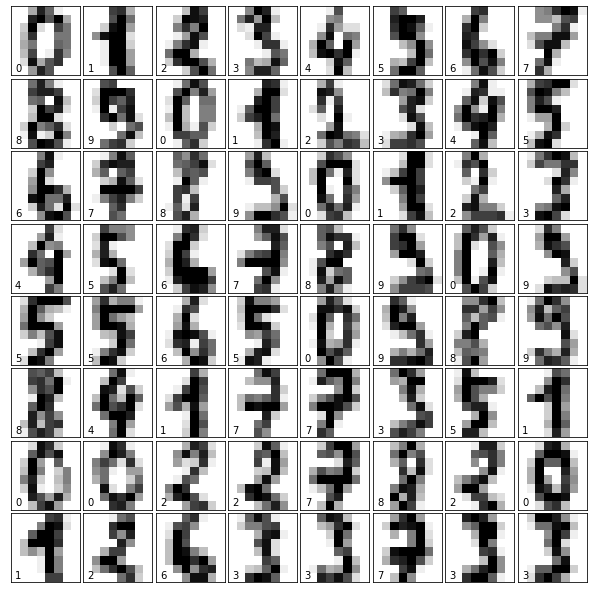

In [2]:
digits = load_digits()
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

Розбиваємо на підвибірки та стандартизуємо дані. 

In [3]:
from sklearn.preprocessing import StandardScaler

X, y = digits.data, digits.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Створюємо нейронну модель багатошарового персептрону за допомогою класу sklearn MLPClassifier. <br>
&emsp; warm_start - повторно використовуdfnb рішення попереднього виклику <br>
&emsp; early_stopping - використовувати ранню зупинку для припинення навчання, якщо оцінка перевірки не покращується. Якщо встановлено значення true, автоматично припиняє навчання, коли оцінка перевірки не покращиться щонайменше протягом n_iter_no_change послідовних епох. Ефективний лише тоді, коли solver=’sgd’ або ‘adam’.<br><br>
Підбираємо за допомогою рішітчатого пошуку параметр solver (згідно варіанту). <br>
###### Слід відзначити, що решітчатий пошук автоматично розбиває передані дані (X_train, y_train) на визначену відповідним параметром кількість (cv=5) та потім усріднює результат.

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

clf = MLPClassifier(warm_start = True, early_stopping = True, max_iter = 1000)

params = {
    'solver' : ['lbfgs', 'sgd', 'adam']
}

print("\tGrid Search:")
rfc = GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring = 'accuracy',
                   refit = True, verbose=3)
rfc.fit(X_train, y_train)


print(f"\tBest params: {rfc.best_params_}")
print(f"\tBest score: {rfc.best_score_}")

	Grid Search:
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ......................solver=lbfgs;, score=0.979 total time=   0.2s
[CV 2/5] END ......................solver=lbfgs;, score=0.962 total time=   0.3s
[CV 3/5] END ......................solver=lbfgs;, score=0.962 total time=   0.1s
[CV 4/5] END ......................solver=lbfgs;, score=0.962 total time=   0.2s
[CV 5/5] END ......................solver=lbfgs;, score=0.965 total time=   0.1s
[CV 1/5] END ........................solver=sgd;, score=0.889 total time=   0.8s
[CV 2/5] END ........................solver=sgd;, score=0.878 total time=   0.7s
[CV 3/5] END ........................solver=sgd;, score=0.850 total time=   0.7s
[CV 4/5] END ........................solver=sgd;, score=0.864 total time=   0.7s
[CV 5/5] END ........................solver=sgd;, score=0.889 total time=   0.7s
[CV 1/5] END .......................solver=adam;, score=0.941 total time=   0.5s
[CV 2/5] END ......................

Ця модель оптимізує log-loss функцію за допомогою LBFGS або стохастичного градієнтного спуску. Решітчатий пошук показав, що модель дає найкращі результати з 'solver' = 'lbfgs', проте з ним ми за означенням не можемо використовувати градієнтний спуск та побудувати криву втрат, тому обираємо другий за результатами solver = 'adam'.  

MLPClassifier score for load_digits: 0.9138888888888889

First 3 and last 3 iteration of Loss curve

2.250412675836862
1.7938256753811666
1.4342535682238466
0.1575657427222673
0.1476168039157057
0.13886643168834653


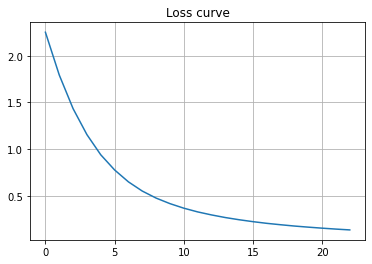

In [5]:
clf = MLPClassifier(warm_start = True, early_stopping = True, max_iter = 10000, solver='adam')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"MLPClassifier score for load_digits: {clf.score(X_test, y_test)}\n")

loss = clf.loss_curve_

plt.plot(loss)
plt.grid(True)
plt.title("Loss curve")

print("First 3 and last 3 iteration of Loss curve\n")
for i in [0, 1, 2, -3,-2, -1]: print(loss[i])

За допомогою функції classification_report виводимо оцінки якості нашої класифікації.<br>
&emsp; Accuracy - доля вірних відповідей у загальній кількості відповідей. Оскільки маємо приблизно однакову кількість об'єктів кожного класу, то метрика дає актуальну оцінку. <br>
&emsp; Precision - відповідність наданих міток справжнім значенням. <br>
&emsp; Recall - доля вірно класифікованих об'єктів у загальній кількості даного класу. <br>
&emsp; F1 - середнє гармонічне двох попередніх метрик. <br>
&emsp; Macro avg обчислює метрику незалежно для кожного класу, а потім бере середнє.<br>
&emsp; Weighted avg враховує різний ступінь важливості чисел у наборі даних. <br>

In [6]:
from sklearn.metrics import classification_report
print(f"Quality metrics\n{classification_report(y_pred, y_test)}")

Quality metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.82      0.80      0.81        35
           2       0.94      0.92      0.93        36
           3       0.95      0.90      0.92        39
           4       0.97      0.95      0.96        40
           5       0.97      0.91      0.94        32
           6       0.97      1.00      0.99        34
           7       0.95      0.98      0.97        43
           8       0.64      0.82      0.72        28
           9       0.91      0.84      0.88        38

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.92      0.91      0.92       360



Матриця неточностей показує які класи як були класифіковані. Ідеальний результат - заповнена лише діагональ.

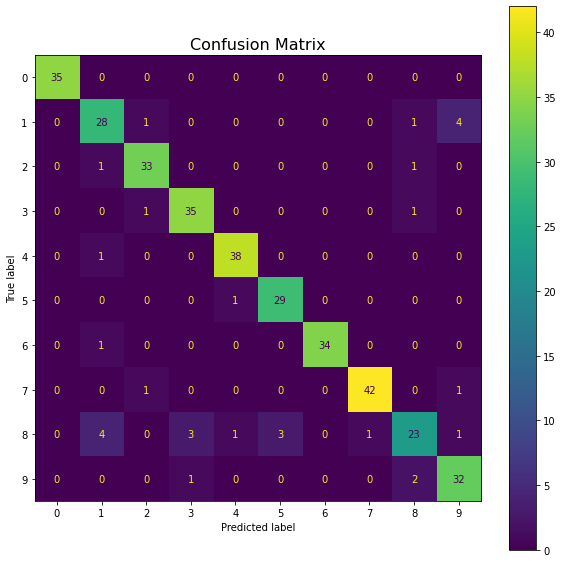

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix", fontsize=16)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)

Вказує долю істинно позитивних класифікацій по відношенню до долі хибно позитивних класифікацій.<br>
AUC - Area Under the Curve - площа під ROC-кривою - один із способів порівняння класифікаторів. На графіку відповідне значення позначене у легенді як area.

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

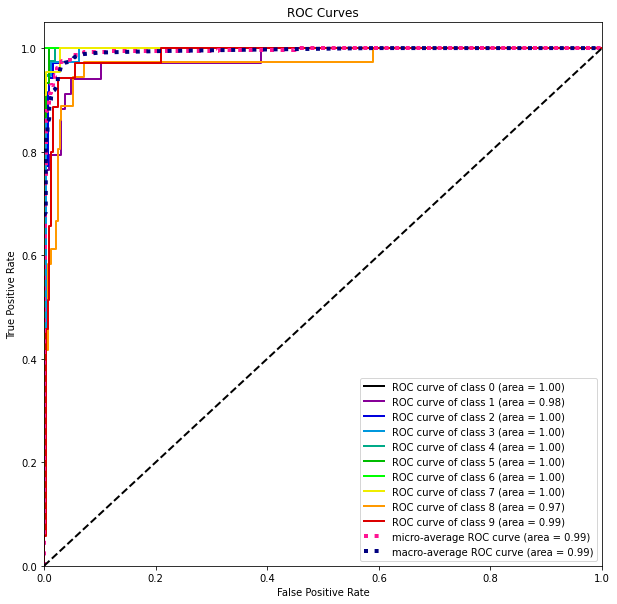

In [8]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)
fig, ax = plt.subplots(figsize=(10,10))
skplt.metrics.plot_roc(y_test, predicted_probas, ax=ax)

#### Будуємо ансамблі моделей StackingClassifier.
&emsp; Стековане узагальнення полягає в суміщенні результатів окремого оцінювача та використанні класифікатора для обчислення остаточного прогнозу. Stacking дозволяє використовувати силу кожного окремого оцінювача, використовуючи їх вихід як вхідні дані для кінцевої оцінки. <br>
&emsp; estimators - базові оцінювачі, які будуть зведені разом.<br>
&emsp; final_estimator - класифікатор, який буде використовуватися для поєднання базових оцінок. Класифікатором за замовчуванням є LogisticRegression.<br>
&emsp; stack_method - методи, викликані для кожної базової оцінки.<br>
&emsp; &emsp; 'predict' передбачає мітку;<br>
&emsp; &emsp; 'predict_proba' повертає ймовірність належності об'єкта певному класу;<br>
&emsp; &emsp; 'decision_function' повертає масив форми (n_samples, n_classes), заповнений показником довіри, який в основному є відстанню зразка від гіперплощини моделі.

In [9]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

n_iter = 10000

estimators = [ ('dt', DecisionTreeClassifier()),
             ('kmeans', KNeighborsClassifier())]
stack_method = {'predict_proba', 'decision_function', 'predict'}

for index, estimator in estimators:
    print(f"Score for final estimator {estimator} with stack_method : ")
    for st_method in stack_method:
        if hasattr(estimator, st_method):

            clf = StackingClassifier(estimators=estimators, final_estimator=estimator,
                                     stack_method = st_method)
        score = clf.fit(X_train, y_train).score(X_test, y_test)
        print(f"   {st_method} : {score:.5f}")

Score for final estimator DecisionTreeClassifier() with stack_method : 
   decision_function : 0.92500
   predict : 0.95556
   predict_proba : 0.97222
Score for final estimator KNeighborsClassifier() with stack_method : 
   decision_function : 0.97222
   predict : 0.94444
   predict_proba : 0.92778


### Будуємо ансамблі RandomForestClassifier().
&emsp; RandomForestClassifier - оцінювач, який навчає низку класифікаторів дерева рішень на різних підвибірках набору даних і використовує усереднення для підвищення точності прогнозування та контролю перенавчання. <br>
&emsp; Використовуємо решітчатий пошук для підбору гіперпараметрів, в основному - кількості класифікаторів в ансамблі.<br>

In [10]:
clf = RandomForestClassifier()

params = {
    'n_estimators' : [10, 100, 1000],
    'criterion' : ['gini', 'entropy'],
    'class_weight' : ['balanced', 'balanced_subsample']
}

print("\tGrid Search:")
rfc = GridSearchCV(estimator=clf, param_grid=params, cv=2, scoring = 'accuracy',
                   refit = True, verbose=3)
rfc.fit(X_train, y_train)


print(f"\tBest params: {rfc.best_params_}")
print(f"\tBest score: {rfc.best_score_}")

	Grid Search:
Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END class_weight=balanced, criterion=gini, n_estimators=10;, score=0.937 total time=   0.0s
[CV 2/2] END class_weight=balanced, criterion=gini, n_estimators=10;, score=0.933 total time=   0.0s
[CV 1/2] END class_weight=balanced, criterion=gini, n_estimators=100;, score=0.964 total time=   0.2s
[CV 2/2] END class_weight=balanced, criterion=gini, n_estimators=100;, score=0.964 total time=   0.2s
[CV 1/2] END class_weight=balanced, criterion=gini, n_estimators=1000;, score=0.968 total time=   2.2s
[CV 2/2] END class_weight=balanced, criterion=gini, n_estimators=1000;, score=0.964 total time=   2.1s
[CV 1/2] END class_weight=balanced, criterion=entropy, n_estimators=10;, score=0.926 total time=   0.0s
[CV 2/2] END class_weight=balanced, criterion=entropy, n_estimators=10;, score=0.922 total time=   0.0s
[CV 1/2] END class_weight=balanced, criterion=entropy, n_estimators=100;, score=0.972 total time=   0.3s


Графік залежності Accuracy від кількості оцінювачів в ансамблі. Можемо бачити, що для N_estimators від 2 до 10 правильність однакова. В основному своєї порогової правильності - далі вона не змінюється - ансамблі показують з N_estimators = 500.

Text(0, 0.5, 'Accuracy')

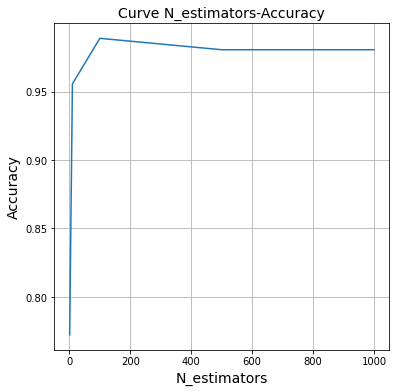

In [11]:
from sklearn.metrics import accuracy_score


accuracy = []
n_estim = [1, 10, 100, 500, 1000]
for n in n_estim:
    y_pred = RandomForestClassifier(n_estimators = n).fit(X_train, y_train).predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.figure(figsize = (6, 6))
plt.grid(True)
plt.plot(n_estim, accuracy)

plt.title("Curve N_estimators-Accuracy", fontsize = 14)
plt.xlabel("N_estimators", fontsize = 14)
plt.ylabel("Accuracy", fontsize = 14)


Оцінюємо результати роботи RandomForestClassifier за допомогою out-of-bag - прикладів, які не використовувалися під час баггінгу. Це усереднена оцінка: чим менше було непомічено прикладів, тим вона вища.

In [12]:
clf = RandomForestClassifier(warm_start = True, oob_score = True, n_estimators = 1000,
                            bootstrap = True, random_state = 42)
clf.fit(X_train, y_train)
print(f'oob_score_ : {clf.oob_score_:.5f}')

oob_score_ : 0.97773


## Будуємо Stacking ансамблі, порівнюємо метрики якості ансамблів та окремих моделей. 

In [13]:
estimators = [ ('mlp', MLPClassifier(warm_start = True, early_stopping = True, max_iter = 10000, solver='lbfgs')),
             ('dtc', DecisionTreeClassifier())]

sc = StackingClassifier(estimators=estimators).fit(X_train, y_train)
y_pred_sc = sc.predict(X_test)
print(f"Quality metrics for StackingClassifier\n{classification_report(y_pred_sc, y_test)}")
print(f"Score for StackingClassifier : {sc.score(X_test, y_test)} ")

Quality metrics for StackingClassifier
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.97      0.97      0.97        34
           2       1.00      0.95      0.97        37
           3       1.00      1.00      1.00        37
           4       0.97      0.88      0.93        43
           5       0.93      0.93      0.93        30
           6       1.00      1.00      1.00        35
           7       0.95      0.98      0.97        43
           8       0.83      0.94      0.88        32
           9       0.97      0.97      0.97        35

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

Score for StackingClassifier : 0.9611111111111111 


In [14]:
mlp = MLPClassifier(warm_start = True, early_stopping = True, 
                           max_iter = 10000, solver='lbfgs').fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test) 
print(f"Quality metrics for MLPClassifier\n{classification_report(y_pred_mlp, y_test)}")
print(f"Score for MLPClassifier : {mlp.score(X_test, y_test)} ")

Quality metrics for MLPClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      0.97      0.96        33
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        38
           4       0.97      0.88      0.93        43
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        35
           7       0.91      0.98      0.94        41
           8       0.86      0.94      0.90        33
           9       0.97      0.92      0.94        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

Score for MLPClassifier : 0.9611111111111111 


In [15]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test) 
print(f"Quality metrics for MLPClassifier\n{classification_report(y_pred_dtc, y_test)}")
print(f"Score for DecisionTreeClassifier : {dtc.score(X_test, y_test)} ")

Quality metrics for MLPClassifier
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.85      0.85      0.85        34
           2       0.94      0.79      0.86        42
           3       0.81      0.86      0.83        35
           4       0.79      0.76      0.77        41
           5       0.87      0.81      0.84        32
           6       0.94      0.89      0.92        37
           7       0.82      0.90      0.86        40
           8       0.64      0.82      0.72        28
           9       0.80      0.74      0.77        38

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360

Score for DecisionTreeClassifier : 0.8361111111111111 


Візуалізуємо границі рішень. Зеленим кольором - вірно класифіковані дані, червоним - хобно. Видно, що при використанні простого DecissionTreeClassifier існує значна неточність.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from itertools import product
from sklearn.decomposition import PCA

def digits_class(X_test, y_pred, title):
    n_classes = 10

    embedding = Pipeline([('pca', PCA(n_components=2)), ('scale', MinMaxScaler())])

    X_test_2d = embedding.fit_transform(X_test)

    plt.figure(figsize=(10, 8))

    for label_true, label_pred in product(range(n_classes), repeat=2):
        marker = '$%d$' % label_pred
        color = 'g' if label_pred == label_true else 'r'
        zorder = 1 if label_pred == label_true else 2
        mask = (y_test == label_true) & (y_pred == label_pred)
        plt.scatter(X_test_2d[mask, 0], X_test_2d[mask, 1],
                    color=color, marker=marker, zorder=zorder)

    plt.title(title, fontsize=16)
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

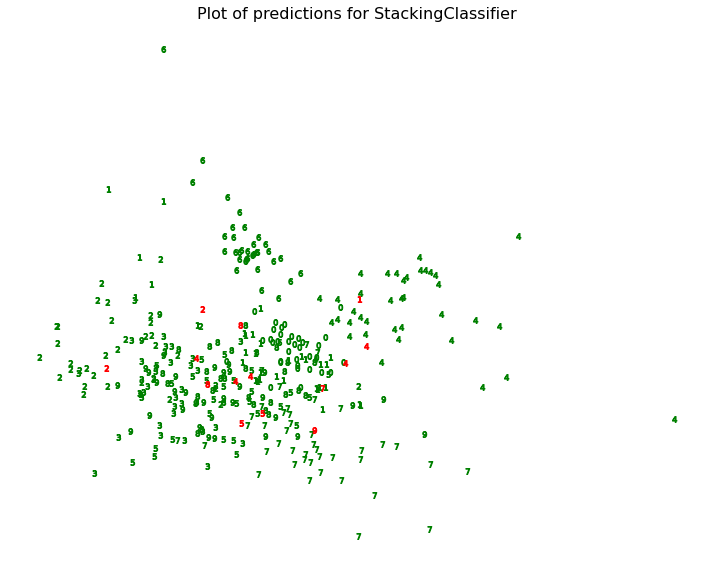

In [17]:
digits_class(X_test, y_pred_sc, 'Plot of predictions for StackingClassifier')

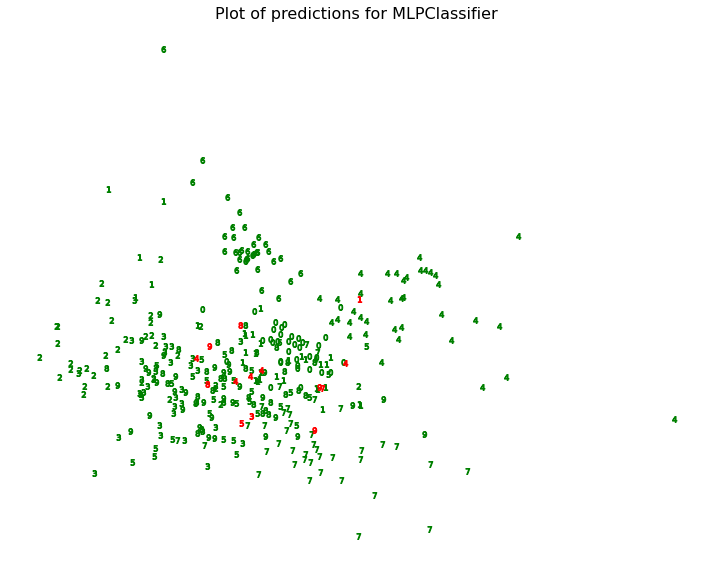

In [18]:
digits_class(X_test, y_pred_mlp, 'Plot of predictions for MLPClassifier')

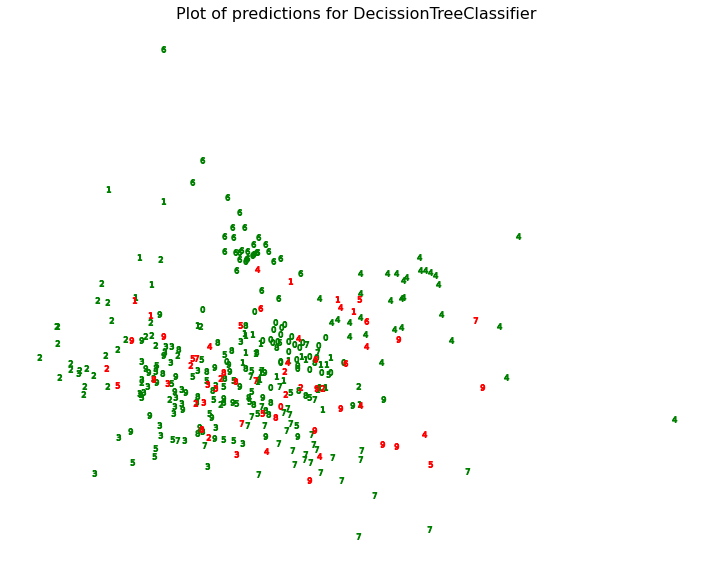

In [19]:
digits_class(X_test, y_pred_dtc, 'Plot of predictions for DecissionTreeClassifier')

Підбираємо гіперпараметри за допомогою GridSearch. Найкращі результати з 'final_estimator' = LogisticRegression(), який є final_estimator за замовчуванням.

In [20]:
from sklearn.linear_model import LogisticRegression

params = {
    'final_estimator' : [LogisticRegression(), mlp, dtc]
}

print("\tGrid Search:")
rfc = GridSearchCV(estimator=sc, param_grid=params, cv=5, scoring = 'accuracy',
                   refit = True, verbose=3)
rfc.fit(X_train, y_train)


print(f"\tBest params: {rfc.best_params_}")
print(f"\tBest score: {rfc.best_score_}")

	Grid Search:
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END final_estimator=LogisticRegression();, score=0.986 total time=   0.9s
[CV 2/5] END final_estimator=LogisticRegression();, score=0.965 total time=   1.0s
[CV 3/5] END final_estimator=LogisticRegression();, score=0.979 total time=   0.9s
[CV 4/5] END final_estimator=LogisticRegression();, score=0.958 total time=   1.5s
[CV 5/5] END final_estimator=LogisticRegression();, score=0.979 total time=   1.0s
[CV 1/5] END final_estimator=MLPClassifier(early_stopping=True, max_iter=10000, solver='lbfgs',
              warm_start=True);, score=0.962 total time=   3.8s
[CV 2/5] END final_estimator=MLPClassifier(early_stopping=True, max_iter=10000, solver='lbfgs',
              warm_start=True);, score=0.951 total time=   3.4s
[CV 3/5] END final_estimator=MLPClassifier(early_stopping=True, max_iter=10000, solver='lbfgs',
              warm_start=True);, score=0.969 total time=   2.8s
[CV 4/5] END final_estimator=ML